In [1]:
import ee
import numpy as np
import matplotlib.pyplot as plt

ee.Authenticate()
ee.Initialize()

Enter verification code:  4/1AY0e-g55akCJvTLYUwjJkjw3FdzwAMQoMjFXsx9TUXUQSAmratroUz1jvk4



Successfully saved authorization token.


{'geodesic': False, 'type': 'Polygon', 'coordinates': [[[-126.8205843103241, 65.66551559023394], [-124.25347520134201, 65.66551559023394], [-124.25347520134201, 66.70265632676876], [-126.8205843103241, 66.70265632676876], [-126.8205843103241, 65.66551559023394]]]}
{'type': 'Projection', 'crs': 'SR-ORG:6974', 'transform': [463.312716528, 0, -20015109.354, 0, -463.312716527, 10007554.677]}
463.3127165275
[[12 13 13 ...  0  9  6]
 [14 10 12 ...  5 11 11]
 [12 11 12 ...  7  7  9]
 ...
 [12  9  9 ... 11 11  5]
 [ 9 11 11 ...  4  4  5]
 [11 15 12 ...  4  5  4]]
(250, 748)
{'type': 'Projection', 'crs': 'EPSG:4326', 'transform': [1, 0, 0, 0, 1, 0]}


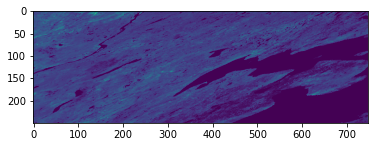

In [2]:

#Load a collection
tiles_CCRS = ee.FeatureCollection("users/ganghong/TilesSampling_Sub")
aoi= ee.FeatureCollection(ee.Feature(tiles_CCRS.toList(tiles_CCRS.size()).get(0))).geometry()
print (aoi.bounds().getInfo())
dataMODIS2 =ee.ImageCollection('MODIS/006/MCD15A3H')\
                      .filterBounds(aoi)\
                      .filterDate('2019-07-01', '2019-09-01')\
                      .select(['Lai', 'Fpar','FparLai_QC'])
#Extract an image
MODIS_list = dataMODIS2.toList(dataMODIS2.size())
MODIS_img = ee.Image(MODIS_list.get(1))
coarsecrs=MODIS_img.projection()
coarsescale=MODIS_img.projection().nominalScale()
print (coarsecrs.getInfo())
print (coarsescale.getInfo())
img = MODIS_img.select('Lai').unmask()

# Get 2-d pixel array for AOI - returns feature with 2-D pixel array as property per band.
band_arrs = img.sampleRectangle(region=aoi.bounds())
#print (band_arrs.getInfo())
band_arr_LAI = band_arrs.get('Lai')
np_arr_LAI = np.array(band_arr_LAI.getInfo())
print (np_arr_LAI)
print (np_arr_LAI.shape)
print (aoi.projection().getInfo())

plt.imshow(np_arr_LAI)
plt.show()